### Question data

In [2]:
# Load metadata.jsonl
import json
# Load the metadata.jsonl file
with open('metadata.jsonl', 'r') as jsonl_file:
    json_list = list(jsonl_file)

json_QA = []
for json_str in json_list:
    json_data = json.loads(json_str)
    json_QA.append(json_data)

In [3]:
json_QA

[{'task_id': 'c61d22de-5f6c-4958-a7f6-5e9707bd3466',
  'Question': 'A paper about AI regulation that was originally submitted to arXiv.org in June 2022 shows a figure with three axes, where each axis has a label word at both ends. Which of these words is used to describe a type of society in a Physics and Society article submitted to arXiv.org on August 11, 2016?',
  'Level': 2,
  'Final answer': 'egalitarian',
  'file_name': '',
  'Annotator Metadata': {'Steps': '1. Go to arxiv.org and navigate to the Advanced Search page.\n2. Enter "AI regulation" in the search box and select "All fields" from the dropdown.\n3. Enter 2022-06-01 and 2022-07-01 into the date inputs, select "Submission date (original)", and submit the search.\n4. Go through the search results to find the article that has a figure with three axes and labels on each end of the axes, titled "Fairness in Agreement With European Values: An Interdisciplinary Perspective on AI Regulation".\n5. Note the six words used as labels

In [4]:
# randomly select 3 samples
# {"task_id": "c61d22de-5f6c-4958-a7f6-5e9707bd3466", "Question": "A paper about AI regulation that was originally submitted to arXiv.org in June 2022 shows a figure with three axes, where each axis has a label word at both ends. Which of these words is used to describe a type of society in a Physics and Society article submitted to arXiv.org on August 11, 2016?", "Level": 2, "Final answer": "egalitarian", "file_name": "", "Annotator Metadata": {"Steps": "1. Go to arxiv.org and navigate to the Advanced Search page.\n2. Enter \"AI regulation\" in the search box and select \"All fields\" from the dropdown.\n3. Enter 2022-06-01 and 2022-07-01 into the date inputs, select \"Submission date (original)\", and submit the search.\n4. Go through the search results to find the article that has a figure with three axes and labels on each end of the axes, titled \"Fairness in Agreement With European Values: An Interdisciplinary Perspective on AI Regulation\".\n5. Note the six words used as labels: deontological, egalitarian, localized, standardized, utilitarian, and consequential.\n6. Go back to arxiv.org\n7. Find \"Physics and Society\" and go to the page for the \"Physics and Society\" category.\n8. Note that the tag for this category is \"physics.soc-ph\".\n9. Go to the Advanced Search page.\n10. Enter \"physics.soc-ph\" in the search box and select \"All fields\" from the dropdown.\n11. Enter 2016-08-11 and 2016-08-12 into the date inputs, select \"Submission date (original)\", and submit the search.\n12. Search for instances of the six words in the results to find the paper titled \"Phase transition from egalitarian to hierarchical societies driven by competition between cognitive and social constraints\", indicating that \"egalitarian\" is the correct answer.", "Number of steps": "12", "How long did this take?": "8 minutes", "Tools": "1. Web browser\n2. Image recognition tools (to identify and parse a figure with three axes)", "Number of tools": "2"}}

import random
random.seed(42)
random_samples = random.sample(json_QA, 1)
for sample in random_samples:
    print("=" * 50)
    print(f"Task ID: {sample['task_id']}")
    print(f"Question: {sample['Question']}")
    print(f"Level: {sample['Level']}")
    print(f"Final Answer: {sample['Final answer']}")
    print(f"Annotator Metadata: ")
    print(f"  ├── Steps: ")
    for step in sample['Annotator Metadata']['Steps'].split('\n'):
        print(f"  │      ├── {step}")
    print(f"  ├── Number of steps: {sample['Annotator Metadata']['Number of steps']}")
    print(f"  ├── How long did this take?: {sample['Annotator Metadata']['How long did this take?']}")
    print(f"  ├── Tools:")
    for tool in sample['Annotator Metadata']['Tools'].split('\n'):
        print(f"  │      ├── {tool}")
    print(f"  └── Number of tools: {sample['Annotator Metadata']['Number of tools']}")
print("=" * 50)

Task ID: 853c8244-429e-46ca-89f2-addf40dfb2bd
Question: In the 2015 Metropolitan Museum of Art exhibition titled after the Chinese zodiac animal of 2015, how many of the "twelve animals of the Chinese zodiac" have a hand visible?
Level: 2
Final Answer: 11
Annotator Metadata: 
  ├── Steps: 
  │      ├── 1. Search "2015 Chinese zodiac animal" on Google search.
  │      ├── 2. Note the animal (ram).
  │      ├── 3. Search "Metropolitan Museum of Art" on Google search.
  │      ├── 4. Open the Metropolitan Museum of Art website.
  │      ├── 5. Click "Exhibitions" under "Exhibitions and Events" 
  │      ├── 6. Click "Past".
  │      ├── 7. Set the year to 2015.
  │      ├── 8. Scroll to find the exhibit mentioning rams and click "Celebration of the Year of the Ram".
  │      ├── 9. Click "View All Objects".
  │      ├── 10. Click "Twelve animals of the Chinese zodiac" to open the image.
  │      ├── 11. Count how many have a visible hand.
  ├── Number of steps: 11
  ├── How long did this 

In [6]:
!pip install -U langchain langchain-openai langchain-community langchain-text-splitters  langchain-huggingface langchain-core

  Using cached langchain-0.3.25-py3-none-any.whl.metadata (7.8 kB)
  Using cached langchain_openai-0.3.18-py3-none-any.whl.metadata (2.3 kB)
  Using cached langchain_community-0.3.24-py3-none-any.whl.metadata (2.5 kB)
  Using cached langchain_huggingface-0.2.0-py3-none-any.whl.metadata (941 bytes)
  Using cached langchain_core-0.3.62-py3-none-any.whl.metadata (5.8 kB)
  Using cached huggingface_hub-0.32.2-py3-none-any.whl.metadata (14 kB)
Using cached langchain-0.3.25-py3-none-any.whl (1.0 MB)
Using cached langchain_community-0.3.24-py3-none-any.whl (2.5 MB)
Using cached langchain_huggingface-0.2.0-py3-none-any.whl (27 kB)
Using cached langchain_core-0.3.62-py3-none-any.whl (438 kB)
Using cached huggingface_hub-0.32.2-py3-none-any.whl (509 kB)
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.30.0
    Uninstalling huggingface-hub-0.30.0:
      Successfully uninstalled huggingface-hub-0.30.0
  Attempting uninstall: langchain-openai
    Found exis

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastembed 0.5.1 requires pillow<11.0.0,>=10.3.0, but you have pillow 11.0.0 which is incompatible.


In [7]:
import langchain 

In [9]:
!pip install -U supabase

  Using cached supabase-2.15.2-py3-none-any.whl.metadata (11 kB)
  Using cached gotrue-2.12.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached postgrest-1.0.2-py3-none-any.whl.metadata (3.5 kB)
  Using cached realtime-2.4.3-py3-none-any.whl.metadata (6.7 kB)
  Using cached storage3-0.11.3-py3-none-any.whl.metadata (1.8 kB)
  Using cached supafunc-0.9.4-py3-none-any.whl.metadata (1.2 kB)
  Using cached aiohttp-3.12.4-cp311-cp311-win_amd64.whl.metadata (7.9 kB)
  Using cached typing_extensions-4.13.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached StrEnum-0.4.15-py3-none-any.whl.metadata (5.3 kB)
Using cached supabase-2.15.2-py3-none-any.whl (17 kB)
Using cached gotrue-2.12.0-py3-none-any.whl (43 kB)
Using cached postgrest-1.0.2-py3-none-any.whl (22 kB)
Using cached realtime-2.4.3-py3-none-any.whl (22 kB)
Using cached storage3-0.11.3-py3-none-any.whl (17 kB)
Using cached supafunc-0.9.4-py3-none-any.whl (7.8 kB)
Using cached aiohttp-3.12.4-cp311-cp311-win_amd64.whl (444 kB)
Using cache

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autogenstudio 0.4.2.1 requires autogen-agentchat<0.5,>=0.4.9.2, but you have autogen-agentchat 0.5.6 which is incompatible.
autogenstudio 0.4.2.1 requires autogen-core<0.5,>=0.4.9.2, but you have autogen-core 0.5.6 which is incompatible.
autogen-ext 0.4.9.3 requires autogen-core==0.4.9.3, but you have autogen-core 0.5.6 which is incompatible.
chainlit 2.5.5 requires asyncer<0.0.8,>=0.0.7, but you have asyncer 0.0.8 which is incompatible.
magentic-one-cli 0.2.4 requires autogen-agentchat<0.5,>=0.4.4, but you have autogen-agentchat 0.5.6 which is incompatible.
pyautogen 0.1.14 requires openai<1, but you have openai 1.77.0 which is incompatible.
weaviate-client 4.14.3 requires authlib<1.3.2,>=1.2.1, but you have authlib 1.6.0 which is incompatible.


In [5]:
### build a vector database based on the metadata.jsonl
# https://python.langchain.com/docs/integrations/vectorstores/supabase/
import os
from dotenv import load_dotenv
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_community.vectorstores import SupabaseVectorStore
from supabase.client import Client, create_client


load_dotenv()
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2") #  dim=768


In [ ]:

supabase_url = "https:"
supabase_key = "ey"
supabase: Client = create_client(supabase_url, supabase_key)

In [7]:
from langchain.schema import Document
docs = []
for sample in json_QA:
    content = f"Question : {sample['Question']}\n\nFinal answer : {sample['Final answer']}"
    doc = {
        "content" : content,
        "metadata" : { # meatadata source
            "source" : sample['task_id']
        },
        "embedding" : embeddings.embed_query(content),
    }
    docs.append(doc)


In [8]:
docs 

[{'content': 'Question : A paper about AI regulation that was originally submitted to arXiv.org in June 2022 shows a figure with three axes, where each axis has a label word at both ends. Which of these words is used to describe a type of society in a Physics and Society article submitted to arXiv.org on August 11, 2016?\n\nFinal answer : egalitarian',
  'metadata': {'source': 'c61d22de-5f6c-4958-a7f6-5e9707bd3466'},
  'embedding': [-0.0026346552185714245,
   0.023060180246829987,
   -0.017573032528162003,
   -0.013291955925524235,
   -0.0203903429210186,
   -0.016542432829737663,
   0.04001589119434357,
   0.017529087141156197,
   0.02352336049079895,
   -0.028402674943208694,
   0.058488957583904266,
   0.03848642110824585,
   -0.03603384271264076,
   0.05896376073360443,
   -0.023190930485725403,
   -0.04314030706882477,
   0.020557943731546402,
   0.04227180406451225,
   -0.015511767007410526,
   0.011203296482563019,
   -0.02394336834549904,
   0.008462865836918354,
   0.034201242

In [ ]:
from supabase import create_client, Client



supabase_url = "https:/o"
supabase_key = "ey"
supabase: Client = create_client(supabase_url, supabase_key)

# Test: Try selecting from a known table
try:
    response = supabase.table("documents").select("*").limit(1).execute()
    if response.data:
        print(" Supabase connection successful!")
        print("Sample row:", response.data)
    else:
        print("Supabase connected, but no data found.")
except Exception as e:
    print("Supabase connection failed:", e)


✅ Supabase connection successful!
Sample row: [{'id': 2, 'created_at': '2025-05-29T03:49:47.602277+00:00', 'content': 'Question : A paper about AI regulation that was originally submitted to arXiv.org in June 2022 shows a figure with three axes, where each axis has a label word at both ends. Which of these words is used to describe a type of society in a Physics and Society article submitted to arXiv.org on August 11, 2016?\n\nFinal answer : egalitarian', 'metadata': {'source': 'c61d22de-5f6c-4958-a7f6-5e9707bd3466'}, 'embedding': '[-0.0026346552,0.02306018,-0.017573033,-0.013291956,-0.020390343,-0.016542433,0.04001589,0.017529087,0.02352336,-0.028402675,0.058488958,0.03848642,-0.036033843,0.05896376,-0.02319093,-0.043140307,0.020557944,0.042271804,-0.015511767,0.0112032965,-0.023943368,0.008462866,0.034201242,0.014322679,0.032600824,0.018118268,0.03146226,-0.011441533,0.024735523,-0.010139609,0.065639585,0.06661009,0.010979971,0.022725008,2.0829184e-06,-0.031171603,-0.01904905,0.01555

In [31]:


# upload the documents to the vector database
try:
    response = (
        supabase.table("documents")
        .insert(docs)
        .execute()
    )
except Exception as exception:
    print("Error inserting data into Supabase:", exception)

# ALTERNATIVE : Save the documents (a list of dict) into a csv file, and manually upload it to Supabase
# import pandas as pd
# df = pd.DataFrame(docs)
# df.to_csv('supabase_docs.csv', index=False)

In [10]:
import pandas as pd
df = pd.DataFrame(docs)
df.to_csv('supabase_docs.csv', index=False)

In [11]:
# add items to vector database
vector_store = SupabaseVectorStore(
    client=supabase,
    embedding= embeddings,
    table_name="documents",
    query_name="match_documents_langchain",
)
retriever = vector_store.as_retriever()

In [13]:
query = "On June 6, 2023, an article by Carolyn Collins Petersen was published in Universe Today. This article mentions a team that produced a paper about their observations, linked at the bottom of the article. Find this paper. Under what NASA award number was the work performed by R. G. Arendt supported by?"
# matched_docs = vector_store.similarity_search(query, 2)
docs = retriever.invoke(query)
docs[0]

Document(metadata={'source': '840bfca7-4f7b-481a-8794-c560c340185d'}, page_content='Question : On June 6, 2023, an article by Carolyn Collins Petersen was published in Universe Today. This article mentions a team that produced a paper about their observations, linked at the bottom of the article. Find this paper. Under what NASA award number was the work performed by R. G. Arendt supported by?\n\nFinal answer : 80GSFC21M0002')

In [14]:
# list of the tools used in all the samples
from collections import Counter, OrderedDict

tools = []
for sample in json_QA:
    for tool in sample['Annotator Metadata']['Tools'].split('\n'):
        tool = tool[2:].strip().lower()
        if tool.startswith("("):
            tool = tool[11:].strip()
        tools.append(tool)
tools_counter = OrderedDict(Counter(tools))
print("List of tools used in all samples:")
print("Total number of tools used:", len(tools_counter))
for tool, count in tools_counter.items():
    print(f"  ├── {tool}: {count}")

List of tools used in all samples:
Total number of tools used: 83
  ├── web browser: 107
  ├── image recognition tools (to identify and parse a figure with three axes): 1
  ├── search engine: 101
  ├── calculator: 34
  ├── unlambda compiler (optional): 1
  ├── a web browser.: 2
  ├── a search engine.: 2
  ├── a calculator.: 1
  ├── microsoft excel: 5
  ├── google search: 1
  ├── ne: 9
  ├── pdf access: 7
  ├── file handling: 2
  ├── python: 3
  ├── image recognition tools: 12
  ├── jsonld file access: 1
  ├── video parsing: 1
  ├── python compiler: 1
  ├── video recognition tools: 3
  ├── pdf viewer: 7
  ├── microsoft excel / google sheets: 3
  ├── word document access: 1
  ├── tool to extract text from images: 1
  ├── a word reversal tool / script: 1
  ├── counter: 1
  ├── excel: 3
  ├── image recognition: 5
  ├── color recognition: 3
  ├── excel file access: 3
  ├── xml file access: 1
  ├── access to the internet archive, web.archive.org: 1
  ├── text processing/diff tool: 1
  ├── gi

#### Graph

In [15]:
system_prompt = """
You are a helpful assistant tasked with answering questions using a set of tools.
If the tool is not available, you can try to find the information online. You can also use your own knowledge to answer the question. 
You need to provide a step-by-step explanation of how you arrived at the answer.
==========================
Here is a few examples showing you how to answer the question step by step.
"""
for i, samples in enumerate(random_samples):
    system_prompt += f"\nQuestion {i+1}: {samples['Question']}\nSteps:\n{samples['Annotator Metadata']['Steps']}\nTools:\n{samples['Annotator Metadata']['Tools']}\nFinal Answer: {samples['Final answer']}\n"
system_prompt += "\n==========================\n"
system_prompt += "Now, please answer the following question step by step.\n"

# save the system_prompt to a file
with open('system_prompt.txt', 'w') as f:
    f.write(system_prompt)

In [16]:
# load the system prompt from the file
with open('system_prompt.txt', 'r') as f:
    system_prompt = f.read()
print(system_prompt)


You are a helpful assistant tasked with answering questions using a set of tools.
If the tool is not available, you can try to find the information online. You can also use your own knowledge to answer the question. 
You need to provide a step-by-step explanation of how you arrived at the answer.
Here is a few examples showing you how to answer the question step by step.

Question 1: In the 2015 Metropolitan Museum of Art exhibition titled after the Chinese zodiac animal of 2015, how many of the "twelve animals of the Chinese zodiac" have a hand visible?
Steps:
1. Search "2015 Chinese zodiac animal" on Google search.
2. Note the animal (ram).
3. Search "Metropolitan Museum of Art" on Google search.
4. Open the Metropolitan Museum of Art website.
5. Click "Exhibitions" under "Exhibitions and Events" 
6. Click "Past".
7. Set the year to 2015.
8. Scroll to find the exhibit mentioning rams and click "Celebration of the Year of the Ram".
9. Click "View All Objects".
10. Click "Twelve anima

In [18]:
import dotenv
from langgraph.graph import MessagesState, START, StateGraph
from langgraph.prebuilt import tools_condition
from langgraph.prebuilt import ToolNode
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_community.document_loaders import WikipediaLoader
from langchain_community.document_loaders import ArxivLoader
from langchain_community.vectorstores import SupabaseVectorStore
from langchain.tools.retriever import create_retriever_tool
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_core.tools import tool
from supabase.client import Client, create_client


In [19]:
load_dotenv()
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")

In [ ]:
os.environ["TAVILY_API_KEY"] = "tvly-1"
os.environ["GOOGLE_API_KEY"] = "AIzaU"

In [21]:
vector_store = SupabaseVectorStore(
    client=supabase,
    embedding= embeddings,
    table_name="documents",
    query_name="match_documents_langchain",
)

In [ ]:
# Fix the tool name issue by using underscores instead of spaces
question_retrieve_tool = create_retriever_tool(
    vector_store.as_retriever(),
    "question_retriever",  
    "Find similar questions in the vector database for the given question.",
)


In [48]:
@tool
def multiply(a: int, b: int) -> int:
    """Multiply two numbers.

    Args:
        a: first int
        b: second int
    """
    return a * b

@tool
def add(a: int, b: int) -> int:
    """Add two numbers.
    
    Args:
        a: first int
        b: second int
    """
    return a + b

@tool
def subtract(a: int, b: int) -> int:
    """Subtract two numbers.
    
    Args:
        a: first int
        b: second int
    """
    return a - b

@tool
def divide(a: int, b: int) -> int:
    """Divide two numbers.
    
    Args:
        a: first int
        b: second int
    """
    if b == 0:
        raise ValueError("Cannot divide by zero.")
    return a / b

@tool
def modulus(a: int, b: int) -> int:
    """Get the modulus of two numbers.
    
    Args:
        a: first int
        b: second int
    """
    return a % b

@tool
def wiki_search(query: str) -> str:
    """Search Wikipedia for a query and return maximum 2 results.
    
    Args:
        query: The search query.
    """
    try:
        search_docs = WikipediaLoader(query=query, load_max_docs=2).load()
        formatted_search_docs = "\n\n---\n\n".join(
            [
                f'<Document source="{doc.metadata["source"]}" page="{doc.metadata.get("page", "")}"/>\n{doc.page_content}\n</Document>'
                for doc in search_docs
            ])
        return formatted_search_docs
    except Exception as e:
        return f"Error searching Wikipedia: {str(e)}"

@tool
def web_search(query: str) -> str:
    """Search the web using Tavily for a query and return maximum 3 results.
    
    Args:
        query: The search query.
    """
    try:
        tavily_search = TavilySearchResults(max_results=3)
        search_docs = tavily_search.invoke({"query": query})
        formatted_search_docs = "\n\n---\n\n".join(
            [
                f'<Document source="{doc.get("url", "Unknown")}" title="{doc.get("title", "")}">\n{doc.get("content", "")}\n</Document>'
                for doc in search_docs
            ])
        return formatted_search_docs
    except Exception as e:
        return f"Error searching web: {str(e)}"

@tool
def arxiv_search(query: str) -> str:
    """Search Arxiv for a query and return maximum 3 results.
    
    Args:
        query: The search query.
    """
    try:
        search_docs = ArxivLoader(query=query, load_max_docs=3).load()
        formatted_search_docs = "\n\n---\n\n".join(
            [
                f'<Document source="{doc.metadata["source"]}" page="{doc.metadata.get("page", "")}"/>\n{doc.page_content[:1000]}\n</Document>'
                for doc in search_docs
            ])
        return formatted_search_docs
    except Exception as e:
        return f"Error searching Arxiv: {str(e)}"

@tool
def similar_question_search(question: str) -> str:
    """Search the vector database for similar questions and return the first 3 results.
    
    Args:
        question: the question human provided.
    """
    try:
        matched_docs = vector_store.similarity_search(question, 3)  
        formatted_search_docs = "\n\n---\n\n".join(
            [
                f'<Document source="{doc.metadata["source"]}" page="{doc.metadata.get("page", "")}"/>\n{doc.page_content[:1000]}\n</Document>'
                for doc in matched_docs
            ])
        return formatted_search_docs
    except Exception as e:
        return f"Error searching similar questions: {str(e)}"




In [49]:
# Define tools list
tools = [
    multiply,
    add,
    subtract,
    divide,
    modulus,
    wiki_search,
    web_search,
    arxiv_search,
    similar_question_search
]

In [ ]:

llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash",api_key = "AIzaU")

In [ ]:
llm_with_tools = llm.bind_tools(tools)

In [51]:
with open('system_prompt.txt', 'r') as f:
    system_prompt = f.read()


In [52]:
sys_msg = SystemMessage(content=system_prompt)

In [53]:
def assistant(state: MessagesState):
    """Assistant node"""
    return {"messages": [llm_with_tools.invoke([sys_msg] + state["messages"])]}

In [54]:



# Build graph
builder = StateGraph(MessagesState)
builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))
builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "assistant")

In [55]:



# Compile graph
graph = builder.compile()


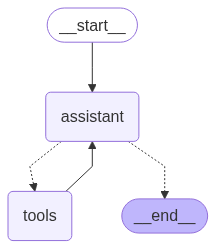

In [56]:
from IPython.display import Image, display

display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [57]:

question = "On June 6, 2023, an article by Carolyn Collins Petersen was published in Universe Today. This article mentions a team that produced a paper about their observations, linked at the bottom of the article. Find this paper. Under what NASA award number was the work performed by R. G. Arendt supported by?"
messages = [HumanMessage(content=question)]
messages = graph.invoke({"messages": messages})

In [58]:


for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

On June 6, 2023, an article by Carolyn Collins Petersen was published in Universe Today. This article mentions a team that produced a paper about their observations, linked at the bottom of the article. Find this paper. Under what NASA award number was the work performed by R. G. Arendt supported by?
================================== Ai Message ==================================

Here's how we can find the NASA award number:

1. **Find the Universe Today article:** I'll start by searching the web for "Carolyn Collins Petersen Universe Today June 6 2023".
2. **Identify the linked paper:** Once I find the article, I will look for the link to the research paper mentioned in the article.
3. **Search the paper for the NASA award number:** Once I have the paper, I will examine it for the NASA award number associated with R. G. Arendt's work.
Tool Calls:
  web_search (fa2c9561-b230-44d0-9de1-8e1c3da2f3c4)
 Call